<a href="https://colab.research.google.com/github/jcvl-udg/collab_notebooks/blob/main/Astropy_tutorial00.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [Viewing and manipulating FITS images](https://learn.astropy.org/tutorials/FITS-images.html)

### Learning Goals
- Open FITS files and load image data
- Make a 2D histogram with image data
- Stack several images into a single image
- Write image data to a FITS file

In [1]:
# Required packages for this notebook:
# astropy
# matplotlib
# numpy

#! pip install -q 'astropy'
#! pip install -q 'matplotlib'
#! pip install -q 'numpy'

Despues de la instalacion se deben importar las librerias para utilizarlas, es una practica comun usarlas mediante un Alias definido por el usuario

In [3]:
import numpy as np

# Set up matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

from astropy.io import fits

Se obtiene el archivo .fits desde la data de astropy (which contain the image data for the Horsehead Nebula) for this tutorial.

In [4]:
from astropy.utils.data import download_file
image_file = download_file('http://data.astropy.org/tutorials/FITS-images/HorseHead.fits', cache=True )

The image has been digitized, that is, the image has been scanned by a computer and converted to a 2-D array. Each position in the array corresponds with the projected position on the sky, and bright areas of the image have high values and dark areas have low values in the array.

To use your own data in the future, use astropy.io.fits.open()

In [5]:
hdu_list = fits.open(image_file)
hdu_list.info()

Filename: /root/.astropy/cache/download/url/ff6e0b93871033c68022ca026a956d87/contents
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     161   (891, 893)   int16   
  1  er.mask       1 TableHDU        25   1600R x 4C   [F6.2, F6.2, F6.2, F6.2]   


In [7]:
image_data = hdu_list[0].data
# ahora esta guardado un arreglo 2D [][]

In [8]:
print(type(image_data))
print(image_data.shape)

<class 'numpy.ndarray'>
(893, 891)


In [9]:
hdu_list.close()
#para evitar un consumo de memoria excesivo se debe cerrar el archivo

In [10]:
image_data = fits.getdata(image_file)

In [11]:
print(type(image_data)) # Show the Python type for image_data
print(image_data.shape) # Show the number of pixels per side in the 2-D image

<class 'numpy.ndarray'>
(893, 891)


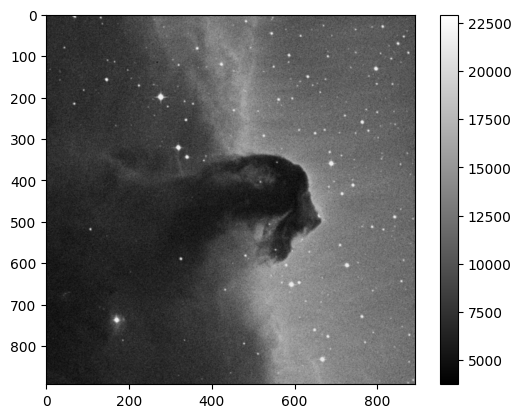

In [12]:
plt.imshow(image_data, cmap='gray')
plt.colorbar()

# To see more color maps
# http://wiki.scipy.org/Cookbook/Matplotlib/Show_colormaps

Algunos datos basicos obtenidos mediante numpy

In [13]:
print('Min:', np.min(image_data))
print('Max:', np.max(image_data))
print('Mean:', np.mean(image_data))
print('Stdev:', np.std(image_data))

Min: 3759
Max: 22918
Mean: 9831.481676287574
Stdev: 3032.3927542049046


In [14]:
print(type(image_data.flatten()))
print(image_data.flatten().shape)

<class 'numpy.ndarray'>
(795663,)


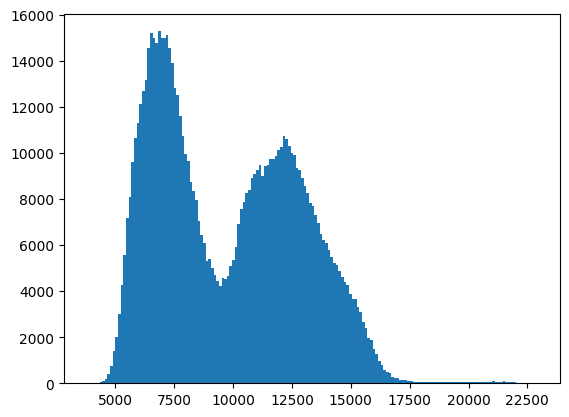

In [15]:
histogram = plt.hist(image_data.flatten(), bins='auto')

In [16]:
from matplotlib.colors import LogNorm

[Text(1, 5000.0, '5,000'),
 Text(1, 10000.0, '10,000'),
 Text(1, 20000.0, '20,000')]

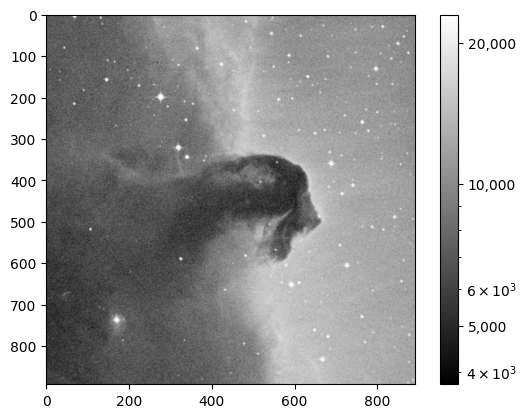

In [17]:
plt.imshow(image_data, cmap='gray', norm=LogNorm())

# I chose the tick marks based on the histogram above
cbar = plt.colorbar(ticks=[5.e3,1.e4,2.e4])
cbar.ax.set_yticklabels(['5,000','10,000','20,000'])